### Project 1:
#### Brand A and Brand B are similar, and they has the same original price,  on black friday, the price of Brand A is 65, and the price of Brand B is 42, does B has bigger discount than A?
#### Answer: the price of A and B before black friday is always changed, we cannot say which one has bigger discount until we calculate z score (standardize number)

In [1]:
import pandas as pd

In [2]:
dataA = pd.read_csv("A.csv")
dataB = pd.read_csv("B.csv")

In [3]:
dataA.head(2)

,x
0,41
1,73


In [4]:
dataB.head(2)

,x
0,44
1,31


In [6]:
# calculate mean
meanA = dataA.mean()
meanB = dataB.mean()
# calculate standard deviation
stdA = dataA.std()
stdB = dataB.std()

In [9]:
# calculate z score
zA = (65 - meanA)/stdA
zB = (42 - meanB)/stdB

print(zA, zB)

x    0.497948
dtype: float64 x    1.081844
dtype: float64


#### We can see zB is bigger than zA, so B has bigger discount than A

## Normal distribution

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
# the data is the time of turn on computer
data = pd.read_csv("data3.csv")
data.head(3)

,x
0,62
1,33
2,41


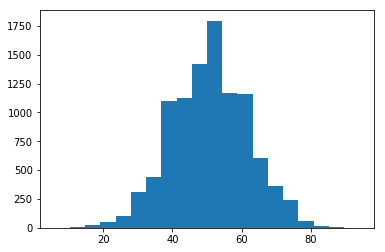

In [15]:
plt.hist(data["x"], bins=20)
plt.show()

#### Generate a normal distribution number with size 1000

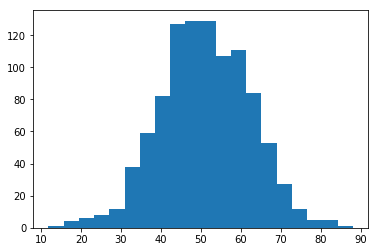

In [16]:
# Two parameters (mean and standard deviation) are needed to generate a normal distribution
ztData = np.random.normal(data.mean(), data.std(), 1000)

plt.hist(ztData, bins=20)
plt.show()

## Normal distribution check

In [17]:
import numpy as np
import pandas as pd
import pylab
import scipy.stats as stats

In [18]:
data = pd.read_csv("data3.csv")

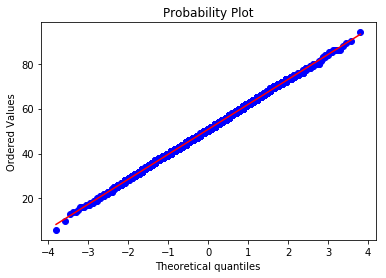

In [19]:
# method 1 : QQ plot test
stats.probplot(data["x"], dist="norm", plot=pylab)
pylab.show()

'''
if all the data are near the red line, we can say the data is almost normal distribution
'''

In [22]:
# method 2: (Shapiro-Wilk) test, sample size should <5000
import scipy as sp
import warnings
warnings.filterwarnings("ignore")

W, p = sp.stats.shapiro(data["x"])
print("Shaprio-Wilk test statistic, W:", W, "\n", "P-value", p)
'''
if W is close to 1, and p is smaller than 0.05, we can say the data is almost normal distribution
'''

Shaprio-Wilk test statistic, W: 0.9990779757499695 
 P-value 2.251467049063649e-05


In [25]:
# method 3: K-S test, there is no sample size limit
'''
K-S method not only tests normal distribion but also other distribution
The requirement is we need to generate a similar distribution with sample
We just use numpy to generate this data, which has the same mean and standard deviation
'''
nData = np.random.normal(data.mean(), data.std(), 1000) # if data is other distribution, you change 'normal'
# stats.ks_2samp(data['x'], nData)
# 2samp means 2 sample
stats.ks_2samp(data['x'], nData.astype(int)) # because our data is int, the generated data should also be int

'''
if the return statistic is close to 0 (0.037 below is close to zero) and pvalue is biggher than 0.05, we 
can say the data is almost normal distribution
'''

Ks_2sampResult(statistic=0.03700000000000003, pvalue=0.1625225573987553)

## Change 'normal distribution' to 'standard  normal distribution' by using z score

In [26]:
data = pd.read_csv("data3.csv") # from above, we know this data is normal distribution

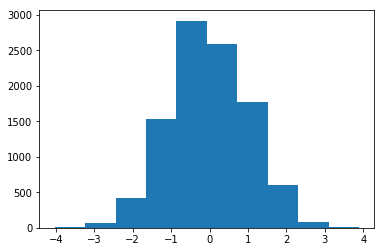

In [31]:
# z score data from normal distribution data is standard normal distribution
zScore = (data['x'] - data['x'].mean())/data['x'].std()

zScore.mean() # mean is almost 0
zScore.std() # std is almost 1

plt.hist(zScore)
plt.show()

In [32]:
# check whether zScore is normal distribution
import scipy
w, p = scipy.stats.shapiro(zScore)
print("w:", w, "\n", "pvalue:", p)

w: 0.9991378784179688 
 pvalue: 4.807842560694553e-05


## Project 2: according to population mean and standard deviation, calculate sample statistic
### Student score is normal distribution, the mean is 517, and the standard deviation is 100
#### Question 1: Student A score is higher/lower than 90% students, what is the student A's score
#### Question 2: Student B's score is 415, how many proportion students have the similar score
#### Question 3: Student C score is 600, how many proportion students' score is lower than C

In [33]:
from scipy.stats import norm
'''
if the score is t distribution, you only need to change 'norm to 't'
'''

In [35]:
# Question 1: calculate the value in the exact proportion
# loc specifies mean, scale specifies standard deviation
print(norm.ppf(0.9, loc=517, scale=100)) # ppf: Percent point function

print(norm.ppf(0.1, loc=517, scale=100))

645.1551565544601
388.84484344553994


In [36]:
# Question 2: calculate the proportion of near one value, this can be understood as probability of getting this score
norm.pdf(415, loc=517, scale=100) # pdf: Probability density function function

0.0023713195201937962

In [37]:
# Question 3: calculate the proportion position of one value
norm.cdf(600, loc=517, scale=100) # cdf: cumulative distribution function

0.7967306081719316

## Project 3: according to sample statistic, calculate population mean and standard deviation
### The time of turn on computer is normal distribution, we know 33 second, rank 5%; 43 second, rank 23%

In [39]:
import numpy as np
from scipy.stats import norm
from scipy.linalg import solve

In [40]:
# calculate z score of 5% and 23% from a standard normal distribution (mean=0, standard=1)
z05_score = norm.ppf(0.05, loc=0, scale=1)
z23_score = norm.ppf(0.23, loc=0, scale=1)
# calculate population mean and standard deviation
# z05_score = (33-mean)/std => we can get mean and std
# z23_score = (43-mean)/std

In [42]:
# use python to calculate mean and std above
a = np.array([[z05_score, 1],[z23_score, 1]])
b = np.array([33, 43])
r = solve(a, b)
print(r) # 11.037 is std, 51.15 is mean

[11.03744502 51.15498148]


In [43]:
# rank verification, rank 5% and rank 23%?
rank_33 = norm.cdf(33, loc=r[1], scale=r[0])
rank_43 = norm.cdf(43, loc=r[1], scale=r[0])
print(rank_33, rank_43)

0.049999999999999975 0.22999999999999993


## Sampling distribution

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
data = pd.read_csv("data4.csv")
data.head(3)

,id,price
0,996961,2788
1,996967,2168
2,761145,1798


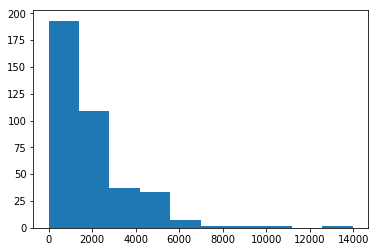

In [49]:
plt.hist(data["price"])
plt.show() # we can see it is not normal distribution

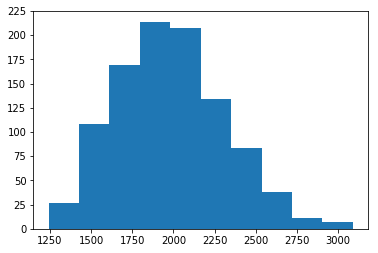

In [50]:
# sampling size n=30
size = 30
# times of sampling
times = 1000
# create empty list for storing sample
sData_s = []
# sampling from price
for i in range(times):
    sData = data['price'].sample(size)
    sData_s.append(sData.mean())

plt.hist(sData_s)
plt.show() # mean distribution from sampling is normal distribution
    

In [51]:
# calculate standard error
import numpy as np
np.std(sData_s)/np.sqrt(len(sData_s))

10.36665267295256

### Verify whether the mean distribution is normal distribution or not

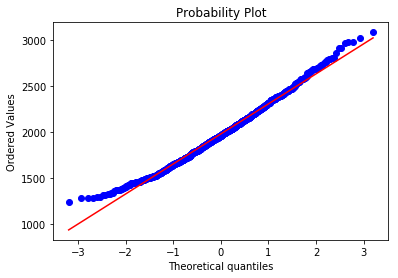

In [52]:
# method 1: QQ plot
stats.probplot(sData_s, dist="norm", plot=pylab)
pylab.show() # check whether most of data are near the red line, the answer is yes

In [53]:
# method 2: Shapiro-Wild test
import scipy
w, p = scipy.stats.shapiro(sData_s)
# if w is close to 1 and p is smaller than 0.05, we can say data is almost normal distribution
print("Shapiro-Wilk test statistic, W", w, "\n", "pvalue", p)

Shapiro-Wilk test statistic, W 0.9903899431228638 
 pvalue 4.056435500388034e-06


In [54]:
# method 3: K-S test
nData = np.random.normal(np.mean(sData_s), np.std(sData_s), 1000)
stats.ks_2samp(sData_s, nData) # statistic should clolse to 0, and pvalue should be bigger than 0.05

Ks_2sampResult(statistic=0.028999999999999998, pvalue=0.7887807460454156)